## Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, load_dataset, plot_decision_boundary, predict, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

train_x, train_y, test_x, test_y = load_dataset()

In [18]:
def model(x, y, lr=0.01, iters=15000, print_cost=True, initialization='he'):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    """

    grads = {}
    costs = []
    m = x.shape[1] # no. of examples
    layers_dims = [x.shape[0], 10, 5, 1]

    if initialization == 'zeros':
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == 'random':
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == 'he':
        parameters = initialize_parameters_he(layers_dims)

    for i in range(iters):
        a3, cache = forward_propagation(x, parameters)
        cost = compute_loss(a3, y)
        grads = backward_propagation(x, y, cache, parameters)

        parameters = update_parameters(parameters, grads, lr)

        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
        
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title('Learning rate = ' + str(lr))
    plt.show()

    return parameters


### 1.Neural Network Model

we have 3 types of initialization that will be discussed in it

#### ZEROS initialization - setting 'zeros' to all params.
#### RANDOM initialization - setting 'random' numbers as params value
#### HE initialization - random values scaled according to the dimensions of previous layer


#### 2. Zero initialization

- the weight matrices and the bias ones are initialized with zero.

In [3]:
def initialize_parameters_zeros(layers_dims):

    parameters = {}
    L = len(layers_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

    

In [4]:
parameters = initialize_parameters_zeros([3,2,1])
print('W1 = ' + str(parameters['W1']))
print('b1 = ' + str(parameters['b1']))
print('W2 = ' + str(parameters['W2']))
print('b2 = ' + str(parameters['b2']))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


Cost after iteration 0: 0.6931471605599455
Cost after iteration 1000: 0.6931471605599454
Cost after iteration 2000: 0.6931471605599455
Cost after iteration 3000: 0.6931471605599455
Cost after iteration 4000: 0.6931471605599455
Cost after iteration 5000: 0.6931471605599455
Cost after iteration 6000: 0.6931471605599455
Cost after iteration 7000: 0.6931471605599455
Cost after iteration 8000: 0.6931471605599455
Cost after iteration 9000: 0.6931471605599455
Cost after iteration 10000: 0.6931471605599455
Cost after iteration 11000: 0.6931471605599455
Cost after iteration 12000: 0.6931471605599455
Cost after iteration 13000: 0.6931471605599455
Cost after iteration 14000: 0.6931471605599455


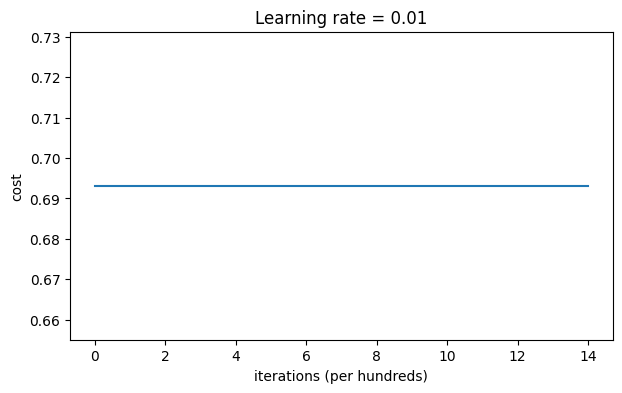

On the train set: 50.0%
On the test set: 50.0%


In [5]:
parameters = model(train_x, train_y, initialization='zeros')
predictions_train = predict(train_x, parameters)
train_acc = np.mean(predictions_train == train_y) * 100
print(f'On the train set: {train_acc}%')
predictions_test = predict(test_x, parameters)
test_acc = np.mean(predictions_test == test_y) * 100
print(f"On the test set: {test_acc}%")


In [6]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


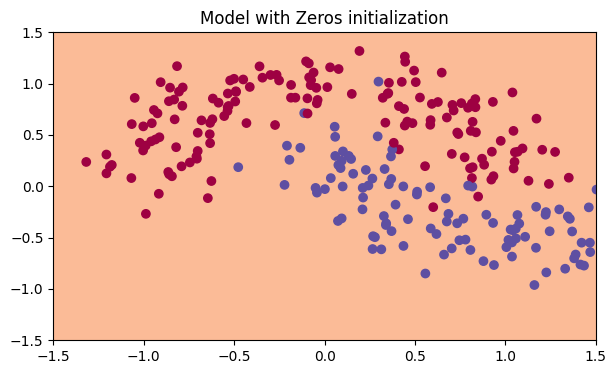

In [7]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x), train_x, train_y)

### 3. Random Initialization:

In [36]:
def initialize_parameters_random(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)               # This seed makes sure your "random" numbers will be the as ours
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers
    
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 0.1
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        ### END CODE HERE ###

    return parameters

In [37]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.17886285  0.04365099  0.00964975]
 [-0.18634927 -0.02773882 -0.0354759 ]]
b1 = [[0.]
 [0.]]
W2 = [[-0.00827415 -0.06270007]]
b2 = [[0.]]


Cost after iteration 0: 0.692584841646609
Cost after iteration 1000: 0.671278756730767
Cost after iteration 2000: 0.4569484601668808
Cost after iteration 3000: 0.32585424522298345
Cost after iteration 4000: 0.30068828492994426
Cost after iteration 5000: 0.29595356485073243
Cost after iteration 6000: 0.29328134806038475
Cost after iteration 7000: 0.28976597608248483
Cost after iteration 8000: 0.2857034868931737
Cost after iteration 9000: 0.28160446835309827
Cost after iteration 10000: 0.27724112565459397
Cost after iteration 11000: 0.27282497892711366
Cost after iteration 12000: 0.2672446560225601
Cost after iteration 13000: 0.259573305823002
Cost after iteration 14000: 0.247103620488255


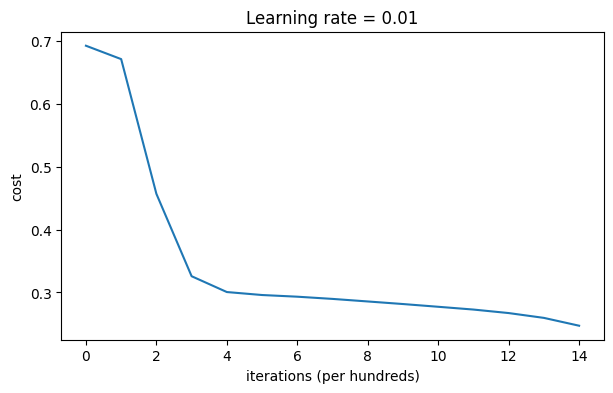

On the train set: 90.33333333333333%
On the test set: 91.0%


In [38]:
parameters = model(train_x, train_y, initialization = "random")
predictions_train = predict(train_x, parameters)
train_acc = np.mean(predictions_train == train_y) * 100
print(f'On the train set: {train_acc}%')
predictions_test = predict(test_x, parameters)
test_acc = np.mean(predictions_test == test_y) * 100
print(f"On the test set: {test_acc}%")

In [39]:
print (predictions_train)
print (predictions_test)

[[1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0
  0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0
  0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0
  0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0
  1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1
  0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0
  0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1
  1 1 1 0 0 0 0 1 1 0 1 0]]
[[0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0
  1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1
  0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1]]


- one possiblity of this is vanishing gradient problem.

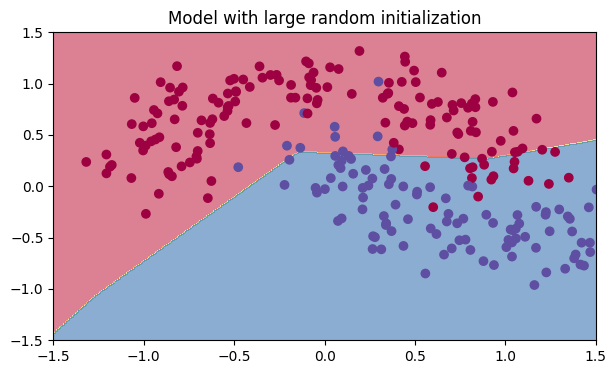

In [41]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x), train_x, train_y)

### 4. He initalization

- sqrt(1./layers_dims[l-1])

In [35]:
def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2./layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        ### END CODE HERE ###
        
    return parameters
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


Cost after iteration 0: 0.7277913615431156
Cost after iteration 1000: 0.32695077134467515
Cost after iteration 2000: 0.2998505371947628
Cost after iteration 3000: 0.28244496630676674
Cost after iteration 4000: 0.26862121356080126
Cost after iteration 5000: 0.25341026554491086
Cost after iteration 6000: 0.23139584235145608
Cost after iteration 7000: 0.203720954507627
Cost after iteration 8000: 0.1718779543808175
Cost after iteration 9000: 0.1406371463288069
Cost after iteration 10000: 0.11785136123484473
Cost after iteration 11000: 0.103266455919586
Cost after iteration 12000: 0.09486159623993477
Cost after iteration 13000: 0.08951684226656166
Cost after iteration 14000: 0.0857685531791027


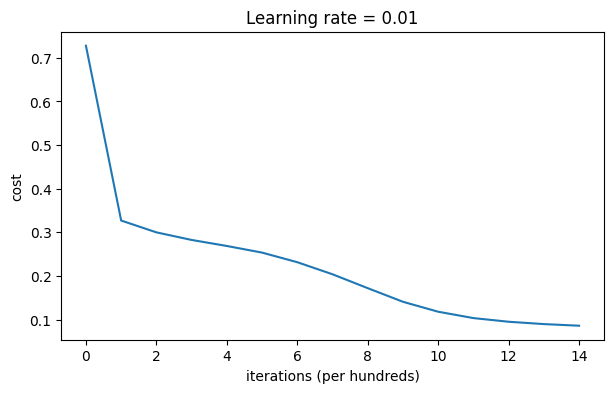

On the train set: 96.66666666666667%
On the test set: 98.0%


In [30]:
parameters = model(train_x, train_y, initialization = "he")
predictions_train = predict(train_x, parameters)
train_acc = np.mean(predictions_train == train_y) * 100
print(f'On the train set: {train_acc}%')
predictions_test = predict(test_x, parameters)
test_acc = np.mean(predictions_test == test_y) * 100
print(f"On the test set: {test_acc}%")

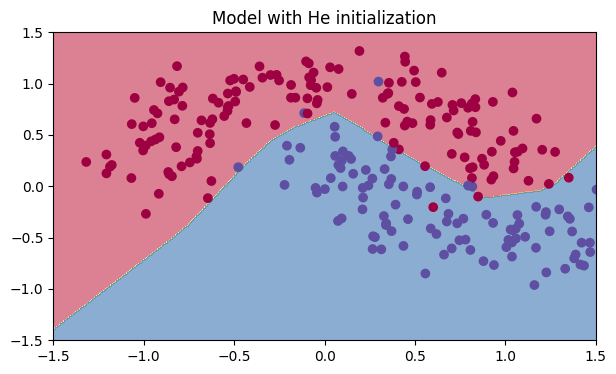

In [17]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x), train_x, train_y)

## Conclusion:

- Different initializations lead to different results
- Random initialization is used to break symmetry and make sure different hidden units can learn different things
- Don't intialize to values that are too large
- He initialization works well for networks with ReLU activations.